In [1]:
import pandas as pd

In [49]:
df=pd.read_csv("sales.csv")
df.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,3,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,4,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,5,141,64,3,340,128,Bad,38,13,Yes,No,no


In [50]:
df.drop(columns=df.columns[0],inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,138,73,11,276,120,Bad,42,17,Yes,Yes,yes
1,111,48,16,260,83,Good,65,10,Yes,Yes,yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes,yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes,no
4,141,64,3,340,128,Bad,38,13,Yes,No,no


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df.isna().sum()


CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
high           0
dtype: int64

In [53]:
# from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
# df['ShelveLoc'] = OrdinalEncoder().fit_transform(df[['ShelveLoc']])

df['ShelveLoc'] = df['ShelveLoc'].astype('category').cat.codes
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,138,73,11,276,120,0,42,17,Yes,Yes,yes
1,111,48,16,260,83,1,65,10,Yes,Yes,yes
2,113,35,10,269,80,2,59,12,Yes,Yes,yes
3,117,100,4,466,97,2,55,14,Yes,Yes,no
4,141,64,3,340,128,0,38,13,Yes,No,no


In [54]:
df=df.apply(pd.to_numeric,errors='ignore')

C:\Users\Kaveeshvar\AppData\Local\Temp\ipykernel_34844\625729022.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df=df.apply(pd.to_numeric,errors='ignore')


In [55]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,138,73,11,276,120,0,42,17,Yes,Yes,yes
1,111,48,16,260,83,1,65,10,Yes,Yes,yes
2,113,35,10,269,80,2,59,12,Yes,Yes,yes
3,117,100,4,466,97,2,55,14,Yes,Yes,no
4,141,64,3,340,128,0,38,13,Yes,No,no


In [56]:
df['Urban'] = df['Urban'].map({'Yes':1, 'No':0})
df['US'] = df['US'].map({'Yes':1, 'No':0})
df['high'] = df['high'].map({'yes':1, 'no':0})
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [22]:
df.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
high           0
dtype: int64

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

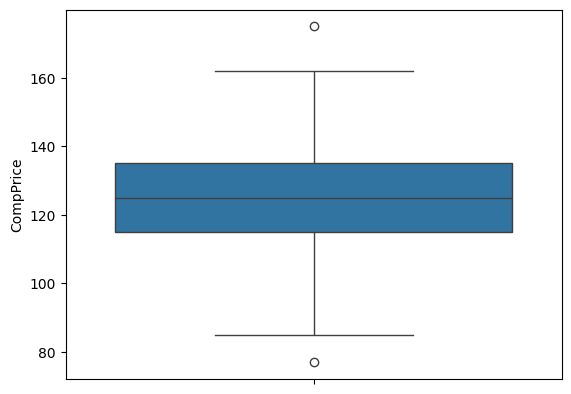

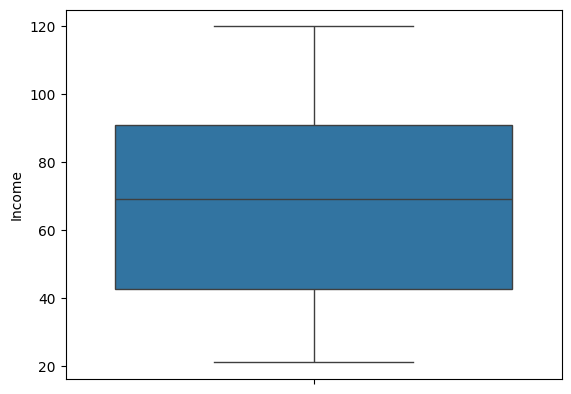

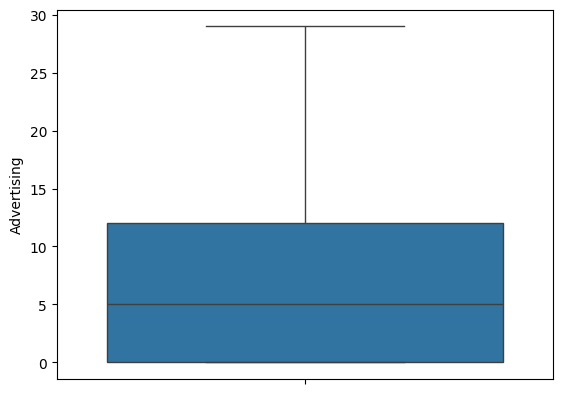

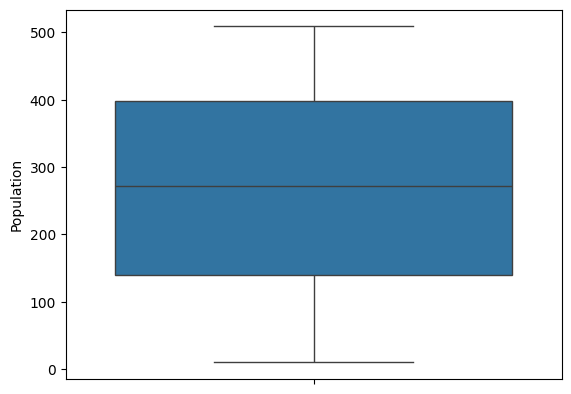

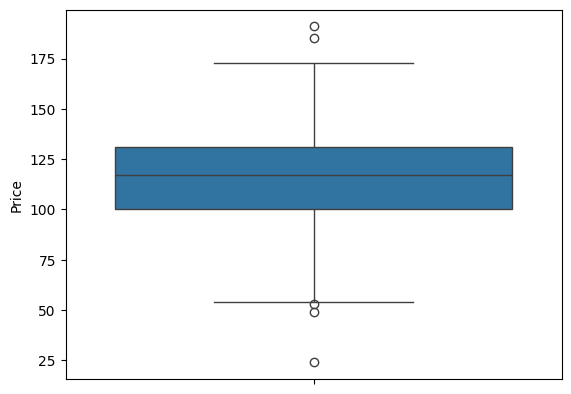

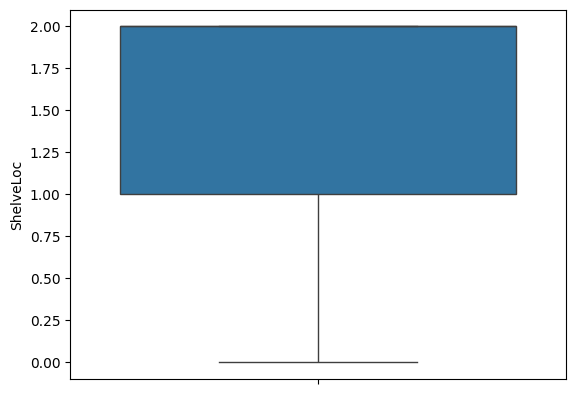

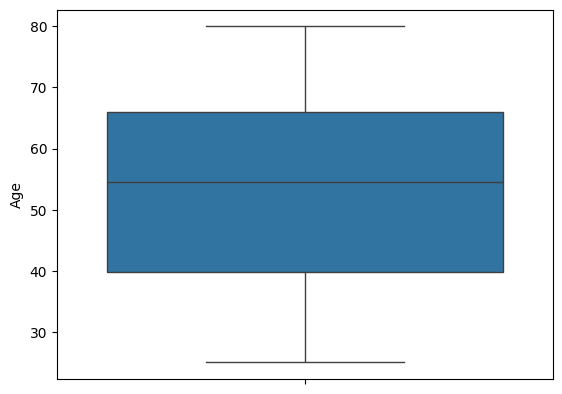

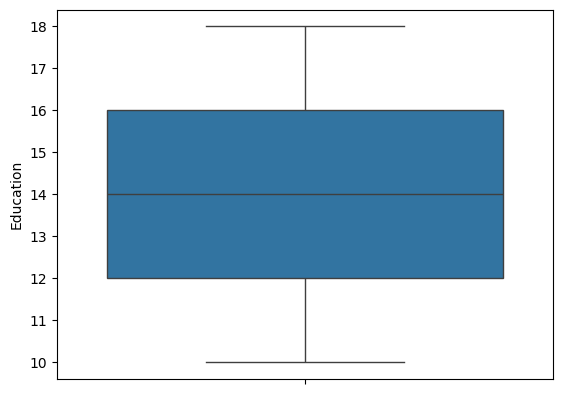

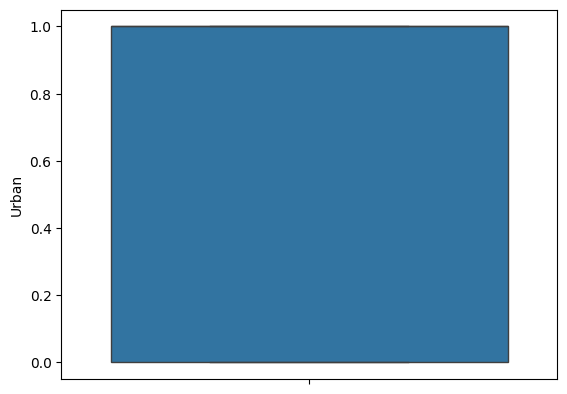

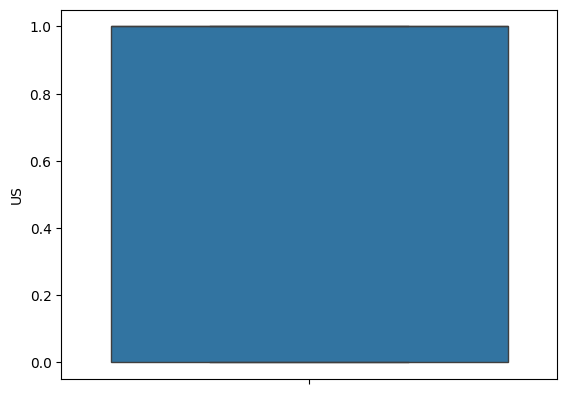

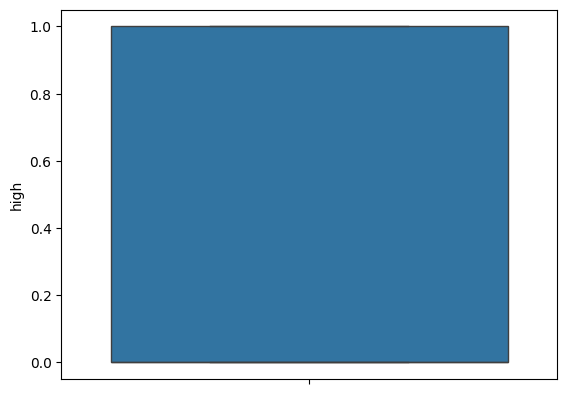

In [59]:
for col in df.columns:
    sns.boxplot(data=df,y=col)
    plt.show()

In [60]:
def outlier_capping(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_extreme = Q1-1.5*IQR
    upper_extreme = Q3+1.5*IQR
    df[column] = df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)

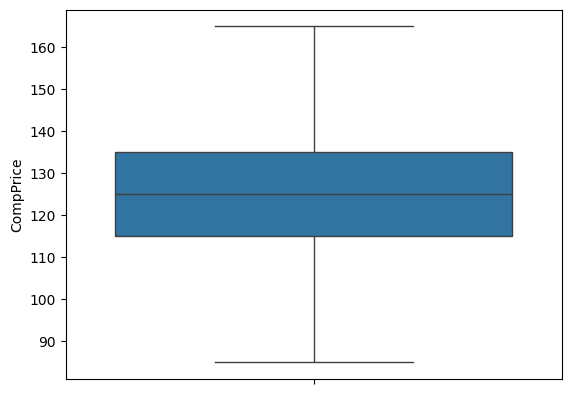

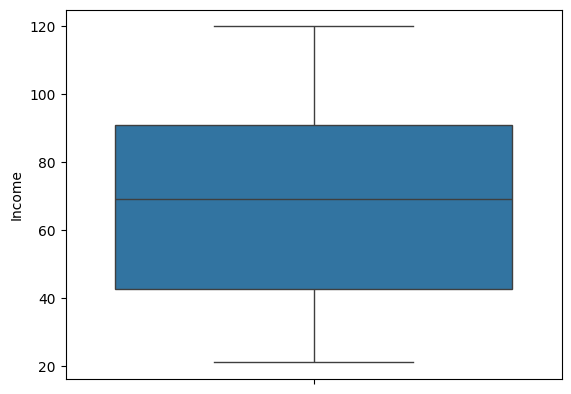

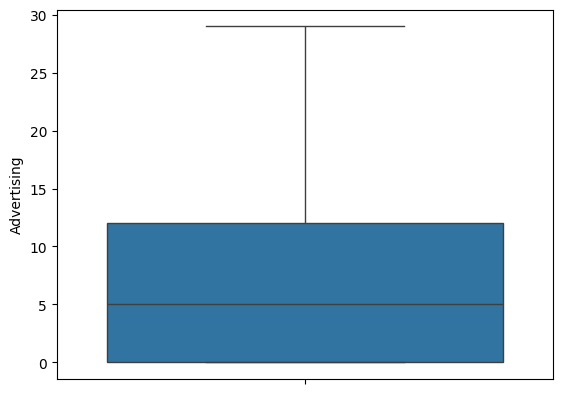

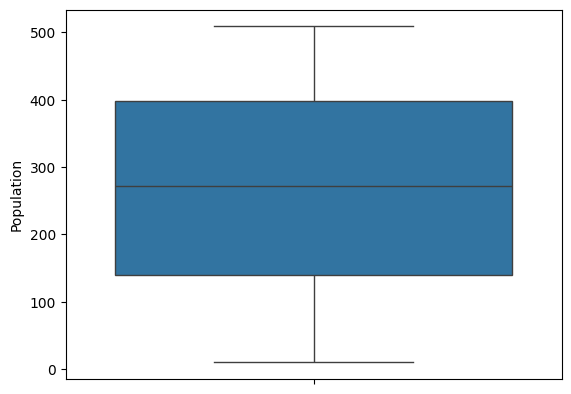

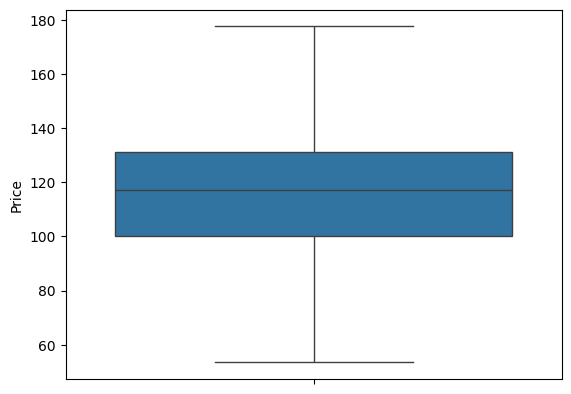

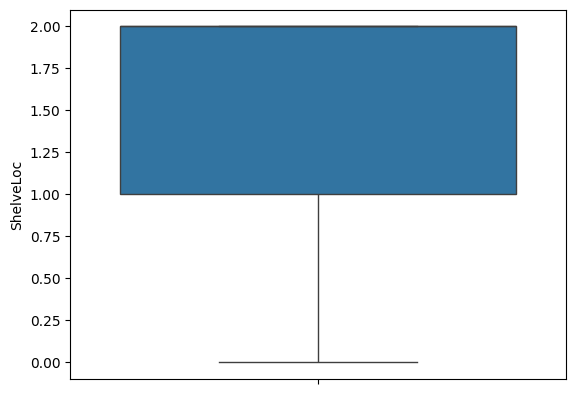

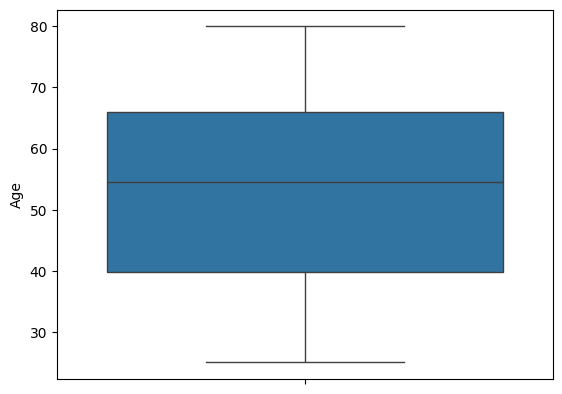

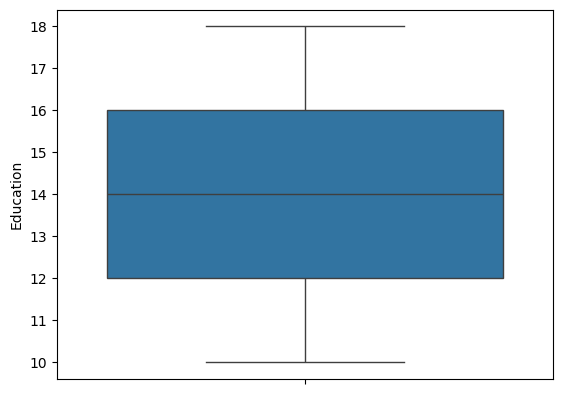

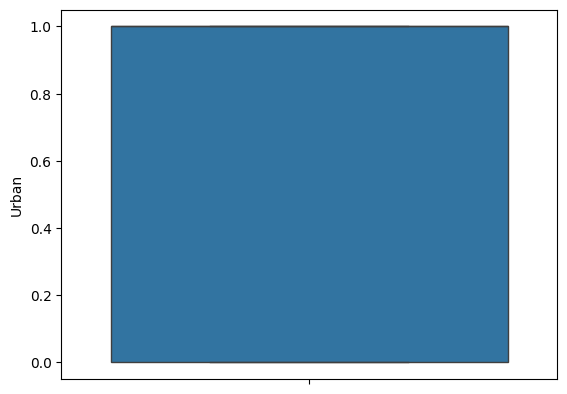

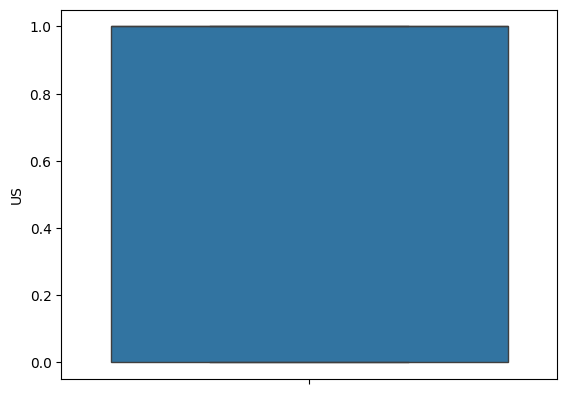

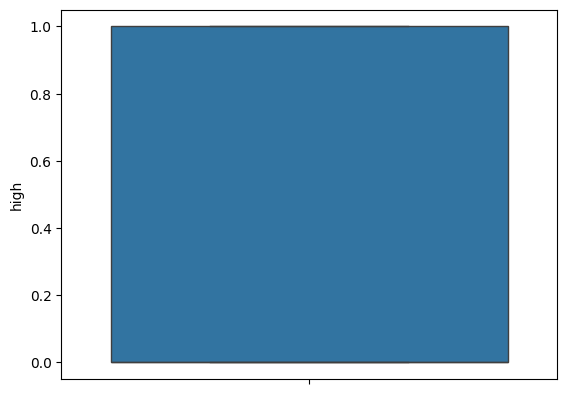

In [61]:
for col in df.columns:
    sns.boxplot(data=df,y=col)
    plt.show()

In [62]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
0,138.0,73,11,276,120.0,0,42,17,1,1,1
1,111.0,48,16,260,83.0,1,65,10,1,1,1
2,113.0,35,10,269,80.0,2,59,12,1,1,1
3,117.0,100,4,466,97.0,2,55,14,1,1,0
4,141.0,64,3,340,128.0,0,38,13,1,0,0


In [63]:
# Create 1 dictionary from the data
df_dict = df[['CompPrice','Income']].set_index('CompPrice').to_dict()['Income']
df_dict

{138.0: 108,
 111.0: 75,
 113.0: 66,
 117.0: 42,
 141.0: 60,
 124.0: 65,
 115.0: 29,
 136.0: 60,
 132.0: 61,
 121.0: 28,
 122.0: 21,
 107.0: 67,
 149.0: 73,
 118.0: 86,
 147.0: 40,
 110.0: 45,
 129.0: 42,
 125.0: 111,
 134.0: 37,
 128.0: 42,
 145.0: 69,
 139.0: 23,
 98.0: 117,
 103.0: 73,
 104.0: 71,
 114.0: 113,
 131.0: 73,
 109.0: 51,
 130.0: 58,
 119.0: 26,
 157.0: 93,
 85.0: 79,
 123.0: 37,
 127.0: 45,
 126.0: 41,
 116.0: 72,
 99.0: 93,
 153.0: 63,
 143.0: 77,
 133.0: 88,
 93.0: 117,
 105.0: 32,
 100.0: 79,
 89.0: 78,
 148.0: 63,
 150.0: 96,
 88.0: 111,
 102.0: 33,
 151.0: 28,
 97.0: 46,
 161.0: 82,
 135.0: 89,
 112.0: 24,
 94.0: 84,
 108.0: 75,
 96.0: 39,
 146.0: 68,
 140.0: 29,
 144.0: 69,
 142.0: 73,
 106.0: 64,
 137.0: 71,
 120.0: 70,
 156.0: 42,
 155.0: 80,
 162.0: 26,
 86.0: 54,
 159.0: 69,
 95.0: 106,
 165.0: 65,
 154.0: 30,
 152.0: 116}

In [66]:
### Top 5 entities by a metric
df.sort_values(by='Income',ascending=False).head(5)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,high
341,98.0,120,0,268,93.0,2,72,10,0,0,0
149,121.0,120,13,140,87.0,2,56,11,1,1,1
220,131.0,120,15,262,124.0,2,30,10,1,1,1
129,143.0,120,7,279,147.0,0,40,10,0,1,0
148,110.0,119,0,384,97.0,2,72,14,0,1,0


In [70]:
df.groupby('Urban')['Population'].mean().reset_index()

,Urban,Population
0,0,276.677966
1,1,259.886525


In [71]:
df.to_csv('Cleaned_data.csv',index=False)